In [1]:
import tensorflow as tf

keras = tf.keras
tf.__version__

'2.5.0'

In [3]:
import pandas as pd

df = pd.read_csv('./input/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [6]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [8]:
df.Sunshine.isnull().sum()

69835

In [9]:
df.shape

(145460, 23)

In [12]:
A = df.copy()
B = df.dropna(axis = 0)

In [21]:
for loc in df.Location.unique():
    print(f'{loc:<10} {B[B.Location == loc].shape[0]}')

Albury     0
BadgerysCreek 0
Cobar      534
CoffsHarbour 1380
Moree      1913
Newcastle  0
NorahHead  0
NorfolkIsland 2464
Penrith    0
Richmond   0
Sydney     1690
SydneyAirport 2870
WaggaWagga 2416
Williamtown 1198
Wollongong 0
Canberra   1078
Tuggeranong 0
MountGinini 0
Ballarat   0
Bendigo    0
Sale       1678
MelbourneAirport 2929
Melbourne  1898
Mildura    2594
Nhil       0
Portland   1863
Watsonia   2730
Dartmoor   0
Brisbane   2953
Cairns     2444
GoldCoast  0
Townsville 2419
Adelaide   0
MountGambier 2465
Nuriootpa  2008
Woomera    1734
Albany     0
Witchcliffe 0
PearceRAAF 0
PerthAirport 2913
Perth      3025
SalmonGums 0
Walpole    0
Hobart     1939
Launceston 0
AliceSprings 2223
Darwin     3062
Katherine  0
Uluru      0


In [22]:
darwin = B[B.Location == 'Darwin']
darwin.shape

(3062, 23)

In [23]:
darwin

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
139111,2008-07-01,Darwin,20.0,33.1,0.0,4.4,11.0,E,41.0,ENE,...,81.0,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,No,No
139112,2008-07-02,Darwin,19.4,32.4,0.0,6.0,10.4,ENE,50.0,SE,...,81.0,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,No,No
139113,2008-07-03,Darwin,18.2,31.8,0.0,8.0,11.0,E,46.0,ESE,...,38.0,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,No,No
139114,2008-07-04,Darwin,17.3,30.7,0.0,7.0,10.4,E,44.0,SE,...,55.0,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,No,No
139115,2008-07-05,Darwin,15.5,30.8,0.0,7.0,10.8,ESE,46.0,E,...,37.0,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [24]:
darwin.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [86]:
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 
            'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
            'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
            # 'RainToday', 'RainTomorrow'
           ]
darwin.loc[:,features].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
139111,20.0,33.1,0.0,4.4,11.0,41.0,13.0,17.0,81.0,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3
139112,19.4,32.4,0.0,6.0,10.4,50.0,15.0,28.0,81.0,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9
139113,18.2,31.8,0.0,8.0,11.0,46.0,22.0,19.0,38.0,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2
139114,17.3,30.7,0.0,7.0,10.4,44.0,22.0,13.0,55.0,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8
139115,15.5,30.8,0.0,7.0,10.8,46.0,20.0,19.0,37.0,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6


In [87]:
N = len(darwin)
N

3062

In [138]:
train = darwin[:int(0.7*N)][features]
valid = darwin[int(0.7*N):int(0.9*N)][features]
test = darwin[int(0.9*N):][features]

len(train), len(valid), len(test)

(2143, 612, 307)

In [139]:
train.shape

(2143, 16)

In [90]:
train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
139111,20.0,33.1,0.0,4.4,11.0,41.0,13.0,17.0,81.0,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3
139112,19.4,32.4,0.0,6.0,10.4,50.0,15.0,28.0,81.0,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9
139113,18.2,31.8,0.0,8.0,11.0,46.0,22.0,19.0,38.0,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2
139114,17.3,30.7,0.0,7.0,10.4,44.0,22.0,13.0,55.0,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8
139115,15.5,30.8,0.0,7.0,10.8,46.0,20.0,19.0,37.0,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6


In [91]:
train.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
141336,23.2,35.0,0.0,10.6,11.8,37.0,9.0,22.0,64.0,35.0,1012.4,1007.3,1.0,1.0,29.4,34.1
141337,22.8,35.7,0.0,8.6,11.5,39.0,11.0,30.0,61.0,47.0,1013.1,1009.1,2.0,1.0,29.2,32.7
141338,26.0,35.6,0.0,7.6,10.2,37.0,20.0,24.0,58.0,52.0,1013.1,1009.5,3.0,6.0,30.3,33.5
141339,25.8,34.4,0.0,7.8,10.0,33.0,13.0,17.0,69.0,46.0,1013.5,1009.1,8.0,7.0,29.8,34.2
141340,23.5,33.6,5.6,7.6,8.3,63.0,11.0,17.0,85.0,56.0,1014.0,1010.1,7.0,6.0,25.2,32.7


In [92]:
valid.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
141341,21.5,33.5,20.0,7.0,10.5,63.0,20.0,22.0,71.0,46.0,1014.1,1008.5,7.0,7.0,27.3,32.6
141342,24.0,34.2,0.0,6.6,9.4,41.0,15.0,15.0,71.0,56.0,1012.8,1009.9,6.0,3.0,29.7,32.1
141343,25.2,33.8,0.0,5.0,11.3,35.0,9.0,24.0,63.0,61.0,1013.9,1009.5,4.0,1.0,29.9,32.3
141344,24.9,33.7,0.0,6.8,11.4,33.0,11.0,19.0,59.0,51.0,1013.5,1009.0,2.0,1.0,30.8,33.4
141345,26.5,33.9,0.0,7.8,11.7,35.0,11.0,28.0,56.0,50.0,1012.7,1008.6,1.0,1.0,30.6,33.1


In [93]:
valid.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
141969,20.3,33.6,0.0,5.8,11.0,43.0,13.0,20.0,66.0,19.0,1014.0,1010.0,1.0,1.0,26.7,33.2
141970,19.6,33.3,0.0,7.6,11.1,50.0,20.0,26.0,64.0,21.0,1015.4,1011.0,2.0,1.0,24.7,32.4
141971,19.1,32.2,0.0,8.8,11.0,44.0,26.0,19.0,32.0,19.0,1016.6,1011.5,1.0,1.0,23.3,31.1
141972,20.5,33.3,0.0,8.6,11.0,41.0,20.0,24.0,45.0,27.0,1014.5,1010.5,1.0,1.0,23.8,32.2
141973,18.8,33.6,0.0,8.2,11.0,44.0,19.0,24.0,34.0,37.0,1014.3,1010.0,1.0,1.0,22.8,31.1


In [94]:
test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
141974,19.0,32.6,0.0,8.0,10.9,35.0,17.0,22.0,39.0,30.0,1013.5,1010.1,1.0,1.0,23.8,30.9
141975,17.6,31.4,0.0,6.8,10.7,31.0,9.0,19.0,60.0,44.0,1013.1,1010.0,1.0,1.0,24.4,30.3
141976,18.7,32.6,0.0,4.6,10.8,33.0,13.0,20.0,59.0,48.0,1012.3,1008.7,0.0,2.0,25.1,30.8
141977,22.1,31.6,0.0,8.0,10.9,48.0,30.0,11.0,25.0,17.0,1013.6,1011.2,1.0,0.0,24.3,30.7
141978,18.8,30.6,0.0,11.6,10.9,46.0,31.0,13.0,20.0,10.0,1014.9,1011.9,1.0,1.0,20.5,29.3


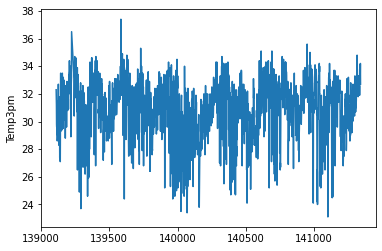

In [172]:
target_feature = 'Temp3pm'
target_feature_pos = train.columns.get_loc(target_feature)

import seaborn as sns

_ = sns.lineplot(data = train, x = train.index, y = target_feature)

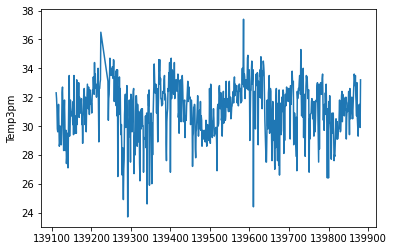

In [97]:
end = 365 * 2
_ = sns.lineplot(data = train[:end], x = train[:end].index, y = target_feature)

In [130]:
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset
dataset = tf.data.Dataset.from_tensor_slices([[1, 2, 3], [2, 3, 4]])
for val in dataset:
    print(type(val))
    print(val)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor([1 2 3], shape=(3,), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor([2 3 4], shape=(3,), dtype=int32)


In [137]:
AA = train #.to_numpy()
## AA[0:2]

dataset = tf.data.Dataset.from_tensor_slices(AA)
for val in dataset:
    print(type(val))
    print(val)
    break

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[2.0000e+01 3.3100e+01 0.0000e+00 4.4000e+00 1.1000e+01 4.1000e+01
 1.3000e+01 1.7000e+01 8.1000e+01 3.2000e+01 1.0160e+03 1.0121e+03
 1.0000e+00 2.0000e+00 2.5400e+01 3.2300e+01], shape=(16,), dtype=float64)


In [177]:
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset#window
window_size = 7
train_dataset = tf.data.Dataset.from_tensor_slices(train)
train_dataset = train_dataset.window(window_size+1, shift = 1, drop_remainder = True)
for window in train_dataset:
    print(type(window))
    print(len(list(window.as_numpy_iterator())))
    # lambda window: (window[:-1], window[-1])
    break
print("----------------------------------------")

train_dataset = tf.data.Dataset.from_tensor_slices(train)
train_dataset = train_dataset.window(window_size+1, shift = 1, drop_remainder = True)
train_dataset = train_dataset.flat_map(lambda x: x.batch(window_size+1))    
for window in train_dataset:
    print(window.shape)
    break
print("----------------------------------------")
    
train_dataset = tf.data.Dataset.from_tensor_slices(train)
train_dataset = train_dataset.window(window_size+1, shift = 1, drop_remainder = True)    
train_dataset = train_dataset.flat_map(lambda x: x.batch(window_size+1))    
train_dataset = train_dataset.shuffle(1000)    
train_dataset = train_dataset.map(lambda w: (w[:-1], w[-1][target_feature_pos]))    
train_dataset = train_dataset.batch(32).prefetch(1)
for x, y in train_dataset:
    print(x.shape, "|", y.shape)
    break


<class 'tensorflow.python.data.ops.dataset_ops._VariantDataset'>
8
----------------------------------------
(8, 16)
----------------------------------------
(32, 7, 16) | (32,)


In [174]:
# TODO: Need normalization first?
def window_dataset(series, window_size, batch_size = 32, shuffle_buffer = 1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1, shift = 1, drop_remainder = True)    
    dataset = dataset.flat_map(lambda x: x.batch(window_size+1))    
    dataset = dataset.shuffle(shuffle_buffer)    
    dataset = dataset.map(lambda w: (w[:-1], w[-1][target_feature_pos]))    
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [175]:
import numpy as np

keras.backend.clear_session()
tf.random.set_seed(1)
np.random.seed(1)

WINDOW_SIZE = 7
train_window_dataset = window_dataset(train, WINDOW_SIZE)
valid_window_dataset = window_dataset(valid, WINDOW_SIZE)

print(train_window_dataset.element_spec)
input_shape = train.shape[1]
input_shape

(TensorSpec(shape=(None, None, 16), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))


16

In [202]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(100, return_sequences = True, input_shape = [None, input_shape]),
    keras.layers.SimpleRNN(100),
    keras.layers.Dense(1),
    keras.layers.Lambda(lambda x: x * 40.0),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, None, 100)         11700     
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [223]:
model.compile(
    optimizer = 'adam',
    loss = 'huber',
    metrics = ['mae'],
)

early_stopping = keras.callbacks.EarlyStopping(patience = 50, restore_best_weights = True)
history = model.fit(
    train_window_dataset,
    epochs = 500,
    validation_data = valid_window_dataset,
    callbacks = [early_stopping],
#    verbose = 0,
)

Epoch 1/500
67/67 [==============================] - 1s 6ms/step - loss: 2.2479 - mae: 2.6961 - val_loss: 1.2324 - val_mae: 1.6567
Epoch 2/500
67/67 [==============================] - 0s 4ms/step - loss: 1.2623 - mae: 1.6957 - val_loss: 1.0901 - val_mae: 1.5118
Epoch 3/500
67/67 [==============================] - 0s 3ms/step - loss: 1.1436 - mae: 1.5738 - val_loss: 1.2780 - val_mae: 1.7240
Epoch 4/500
67/67 [==============================] - 0s 4ms/step - loss: 1.1980 - mae: 1.6328 - val_loss: 1.1866 - val_mae: 1.6271
Epoch 5/500
67/67 [==============================] - 0s 3ms/step - loss: 1.2214 - mae: 1.6516 - val_loss: 1.2070 - val_mae: 1.6464
Epoch 6/500
67/67 [==============================] - 0s 4ms/step - loss: 1.2588 - mae: 1.6920 - val_loss: 1.1969 - val_mae: 1.6351
Epoch 7/500
67/67 [==============================] - 0s 4ms/step - loss: 1.2766 - mae: 1.7123 - val_loss: 1.1259 - val_mae: 1.5584
Epoch 8/500
67/67 [==============================] - 0s 4ms/step - loss: 1.2488 - m

KeyboardInterrupt: 

In [204]:
def window_x_only_dataset(series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift = 1, drop_remainder = True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    return ds

predicted_train = model.predict(window_x_only_dataset(train, WINDOW_SIZE))

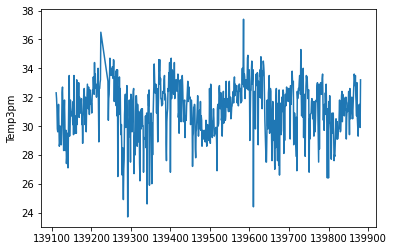

In [205]:
end = 365 * 2
_ = sns.lineplot(data = train[:end], x = train[:end].index, y = target_feature)

In [209]:
print(train.shape)
print(predicted_train.shape)

(2143, 16)
(2137, 1)


In [207]:
predicted = predicted_train[:, 0]
predicted[:5]

array([30.917831, 30.42372 , 29.944696, 30.042906, 30.082285],
      dtype=float32)

<AxesSubplot:>

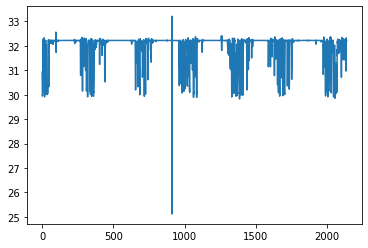

In [208]:
sns.lineplot(x = range(len(predicted)), y = predicted)

In [221]:
real = train[window_size-1:].to_numpy()[:,target_feature_pos]
real.shape
predicted.shape
keras.metrics.mean_absolute_error(real, predicted).numpy()

1.6221427

<AxesSubplot:>

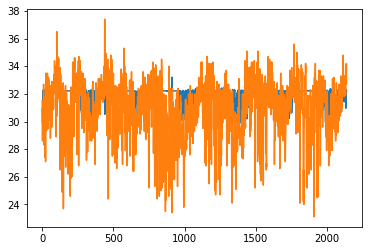

In [222]:
sns.lineplot(x = range(len(predicted)), y = predicted)
sns.lineplot(x = range(len(predicted)), y = real)